# Hypothesis tests

Hypothesis tests regarding registered data can be conducted using the [spm1d](https://spm1d.org) package. This package uses statistical parametric mapping (SPM) to conduct simultaneous inference across the domain, via a [random field theory](https://spm1d.org/rft1d/Theory.html) (RFT) correction for multiple comparisons. This RFT correction is a smoothness-based correction that accurately controls Type I error (usually at $\alpha=0.05$) for arbitrarily smooth (or rough) data when the data are normally distributed at each point in the domain. A list of key SPM and RFT references is available [here](https://spm1d.org/References.html).

Let's conduct a two-sample t-test use the `SimulatedB` dataset.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import spm1d
import nlreg1d as nl

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(10, 101)
(10, 101)

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 17.987)
   SPM.fwhm      :  17.86878
   SPM.resels    :  (1, 5.59635)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  3.36201
   SPM.h0reject  :  True
   SPM.p_set     :  0.002
   SPM.p_cluster :  (0.002)





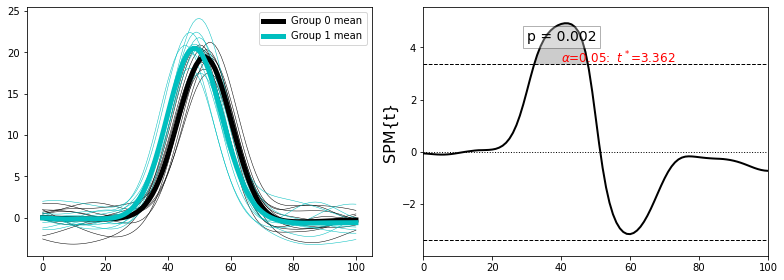

In [2]:
# load data:
dataset = nl.data.SimulatedB()
y0,y1   = dataset.get_dv_by_group()
print(y0.shape)
print(y1.shape)
print()

# conduct hypothesis test
spmi    = spm1d.stats.ttest2( y1, y0 ).inference(0.05)
print(spmi)


# plot results
fig,axs = plt.subplots(1, 2, figsize=(11,4))
ax0,ax1 = axs

h0      = ax0.plot(y0.T, 'k', lw=0.5)[0]
h1      = ax0.plot(y1.T, 'c', lw=0.5)[0]
h0      = ax0.plot(y0.mean(axis=0), 'k', lw=5)[0]
h1      = ax0.plot(y1.mean(axis=0), 'c', lw=5)[0]
ax0.legend( [h0,h1], ['Group 0 mean', 'Group 1 mean'])

spmi.plot(ax=ax1)
spmi.plot_threshold_label(fontsize=12)
spmi.plot_p_values(size=14)

plt.tight_layout()
plt.show()

These results suggest that:

- The null hypothesis of equivalent group means is rejected at $\alpha=0.05$
- The critical threshold is `t* = 3.362`, which is interpreted as follows: Gaussian random fields with the identical smoothness to the observed residuals will yield a maximum t statistic that traverses `t*` with a probability of $\alpha=0.05$
- The probability value (p-value) associated with the observed suprathreshold cluster is `p = 0.002`, which is interpreted as follows: Gaussian random fields with the identical smoothness to the observed residuals will yield a sprathreshold cluster with the observed temporal extent with a probability of $p=0.002$

More details regarding SPM hypothesis testing procedures are available at the links above.

In the context of this study, the key assumption is that the data are normally distributed at each domain point. This assumption is considered in detail in the next notebook.
